# Comprendre ce qu'est le Machine Learning

In [1]:
# Import des librairies nécessaires à la démonstration
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randint,randn,rand
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt

## Approche traditionnelle, quand les spécifications sont simples...

In [2]:
# Une fonction simple pour calculer l'aire d'un rectangle
# avec une option pour rajouter du bruit
def rectArea(length,width,rnd=False):
    if not rnd:
        return length*width
    else:
        return ((length*width)+randn(1)[0]*5)

#### quelle est la surface d'un rectangle de 3x2m ?

In [3]:
print(f"The Area of a 3x2m rectangle is {rectArea(3,2)}m²")

The Area of a 3x2m rectangle is 6m²


#### Maintenant visualisons, ce que représenterait dans un espace à 3 dimensions toutes les surfaces pour des rectangles dont les côtés seraient compris entre 0 et 20

Cela va nous aider à mieux comprendre le reste de la démonstration

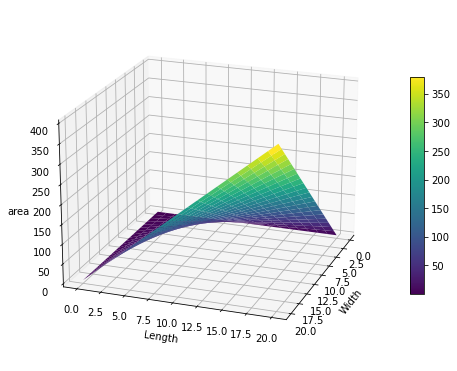

In [4]:
X = np.arange(0, 21, 1) # on discrétise l'axe des x par pas de 1
Y = np.arange(0, 21, 1) # idem sur Y
X, Y = np.meshgrid(X, Y) 
Z = rectArea(X,Y)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="viridis",linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=15)
ax.view_init(elev=20, azim=20)
ax.set_xlabel('Width')
ax.set_ylabel('Length')
ax.set_zlabel('area')
plt.show()
# on a une forme hyperbolique en 3D

## ML n'a pas besoin de spécifications, il apprend de nos données, concrétement, comment à ça marche ? 

A titre d'exemple, je vais générer des nombres aléatoires entre 0 et 20, pour la largeur et la longueur, afin de calculer quelques surfaces avec leurs largeurs, et longueurs associées. Ce seront les données d'entrainement de notre algorithme de Machine Learning. Les "features" seront Longeur et Largeur, la surface sera la cible.

In [5]:
# Pour avoir un résultat répétable on utilise une seed(1) pour intialiser le moteur aléatoire
seed(1)
# je génére 6 couples aléatoires de longueur/largeur
width = randint(1, 21, 6)
length = randint(1, 21, 6)
area=list()
for w,l in zip(width,length):
    area.append(rectArea(w,l))
    
# pour mieux visualiser les données, les voici dans un dataframe
df = pd.DataFrame({'Width' : width,
                   'Length' : length,
                   'Area' : area})
df.sort_values(by=['Area'],inplace=True)
df    

,Width,Length,Area
2,13,1,13
4,10,2,20
0,6,6,36
3,9,17,153
5,12,13,156
1,12,16,192


#### et en 3D, çà donne quoi avec seulement 6 points ?

si vous deviez vous faire une idée, juste avec ces données, pas sur que l'on pourrait déduire facilement qu'il s'agit de calculer la surface d'un rectangle

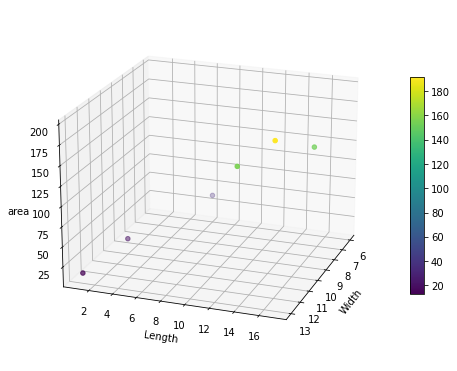

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
surf = ax.scatter(width,length, area, c=area, cmap="viridis")
fig.colorbar(surf, shrink=0.5, aspect=15)
ax.view_init(elev=20, azim=20)
ax.set_xlabel('Width')
ax.set_ylabel('Length')
ax.set_zlabel('area')
plt.show()

#### Séparons les "features" de la cible pour entrainer nos algos ML

In [7]:
X=df[['Width','Length']]
y=df['Area']

# définissons quelques couples de points longueur/largeur pour vérifier la pertinence des modéles qui vont être trouvés
X_test = np.array([[7,5],
                   [2,6],
                   [20,30]])
y_test = np.array([[35],
                  [12],
                  [600]])

# fonction pour afficher le score et les prédictions de nos modéles
def displayScoresAndPredict(model):
    print(f"score sur le jeu d'entraînement pour {type(model).__name__} : {model.score(X, y)*100:.3f} %")
    print(f"score sur le jeu de test pour {type(model).__name__} : {model.score(X_test, y_test)*100:.3f} %")
    print(f"Surfaces prédites par {type(model).__name__} : {model.predict(X_test)}")

In [8]:
# Permettra de projeter en 3D notre modéle, pour qu'on puisse mieux aprécier sa performance
def plotModelvsReal(model,elev=25,azim=25):
    X = np.arange(0, 31, 1) # on discrétise l'axe des x par pas de 1
    Y = np.arange(0, 31, 1) # idem sur Y
    X, Y = np.meshgrid(X, Y) 
    points=np.c_[X.ravel(), Y.ravel()]
    Zhat = model.predict(points)
    Z = rectArea(X,Y)
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    surf = ax.plot_wireframe(X, Y, Zhat.reshape(31,-1), color = 'darkgreen',alpha=0.5)
    ax.plot_wireframe(X, Y, Z, color = 'red', cstride=2, rstride=2)

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Width')
    ax.set_ylabel('Length')
    ax.set_zlabel('area')
    plt.show()

#### Et maintenant passons aux choses sérieuses

In [10]:
# Regression linéaire
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
displayScoresAndPredict(reg)

score sur le jeu d'entraînement pour LinearRegression : 97.835 %
score sur le jeu de test pour LinearRegression : 79.803 %
Surfaces prédites par LinearRegression : [ 26.60917248   3.03130608 388.688335  ]


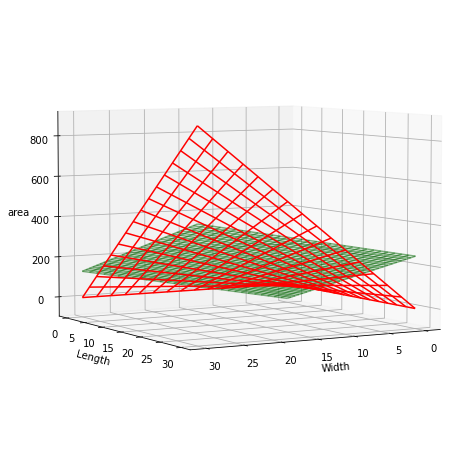

In [11]:
plotModelvsReal(reg,5,60)

In [12]:
# SVM Regressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
svr = SVR(kernel='poly', C=1, epsilon=.1, coef0=1)
svr.fit(X,y)
displayScoresAndPredict(svr)

score sur le jeu d'entraînement pour SVR : 99.737 %
score sur le jeu de test pour SVR : 70.709 %
Surfaces prédites par SVR : [ 33.96028139  24.27151771 854.61006478]


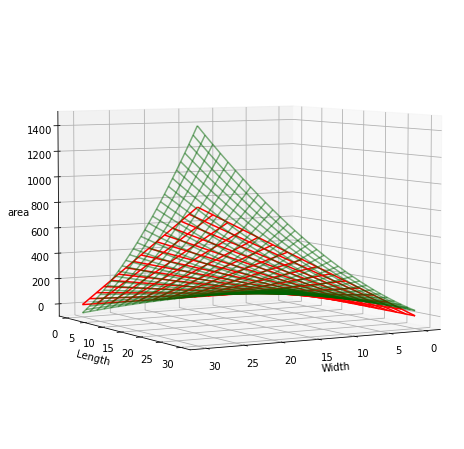

In [13]:
plotModelvsReal(svr,5,60)

In [14]:
# Regression polynomiale de niveau 2 / Trichons un peu :)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
preg = polyreg.fit(X,y)
displayScoresAndPredict(preg)

score sur le jeu d'entraînement pour Pipeline : 100.000 %
score sur le jeu de test pour Pipeline : 100.000 %
Surfaces prédites par Pipeline : [ 35.  12. 600.]


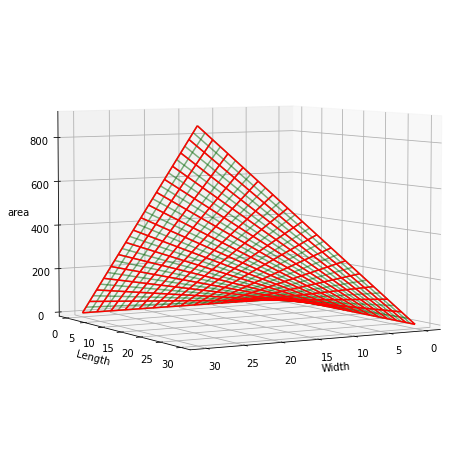

In [15]:
plotModelvsReal(preg,5,60)

#### Que peut on dire ? 
* il y a plein d'algorithmes de ML. Et pour chacun de ces algos, de nombreux hyperparamétres, ils ne fonctionnent pas tous. Ici, utiliser un algorithme de régression linéaire ne peut pas fonctionner.
* pour entrainer un modéle il faut beaucoup de données, sinon le risque est que le modéle marche bien sur les données d'entrainement, mais ne puisse pas généraliser sur des données nouvelles

#### Entrainons à nouveau un SVM sur plus de données (rappelez vous, avec 6 points son score était à peine de 70% sur le jeu de test)

In [16]:
# Ce coup ci, prenons 100 points pour entrainer notre algo SVM
width = randint(1, 21, 100)
length = randint(1, 21, 100)
area=list()
for w,l in zip(width,length):
    area.append(rectArea(w,l))

df = pd.DataFrame({'Width' : width,
                   'Length' : length,
                   'Area' : area})

X=df[['Width','Length']]
y=df['Area']

In [17]:
# 35 - 12 - 600
svr.fit(X,y)
displayScoresAndPredict(svr)

score sur le jeu d'entraînement pour SVR : 99.982 %
score sur le jeu de test pour SVR : 99.981 %
Surfaces prédites par SVR : [ 34.47617184  11.1093819  606.42324709]


In [18]:
# Quelle est l'erreur moyenne absolue du modéle sur notre jeu de test
from sklearn.metrics import mean_absolute_error
y_pred=svr.predict(X_test)
print(f"MAE  = {mean_absolute_error(y_test,y_pred):.2f}")

MAE  = 2.61


In [ ]:
# C'est déjà nettement mieux qu'avec seulement 6 couples de points
plotModelvsReal(svr,5,60)

### Mais un alogrithme de ML n'est pas fait pour résoudre des problémes aussi simples
ajoutons un peu de bruit à nos données...

In [19]:
width = randint(1, 21, 100)
length = randint(1, 21, 100)
area=list()
for w,l in zip(width,length):
    area.append(rectArea(w,l,True))

df = pd.DataFrame({'Width' : width,
                   'Length' : length,
                   'Area' : area})
df.sort_values(by=['Area'],inplace=True)
df.head(5)

,Width,Length,Area
76,1,2,0.431065
72,2,1,1.645636
43,4,1,3.670554
74,1,13,10.057375
21,7,2,11.067984


In [20]:
df.tail(5)

,Width,Length,Area
50,16,18,286.156248
85,17,18,301.313564
27,17,17,301.988954
0,20,17,333.994882
20,18,19,347.621127


In [21]:
X=df[['Width','Length']]
y=df['Area']
svr = SVR(kernel='poly',C=1, epsilon=.1, coef0=1)
svr.fit(X,y)
displayScoresAndPredict(svr)

score sur le jeu d'entraînement pour SVR : 99.619 %
score sur le jeu de test pour SVR : 99.762 %
Surfaces prédites par SVR : [ 35.98266007  14.63605483 622.81753855]


### Même sur des données bien bruitées, l'algorithme entrainé avec les bons paramétres est capable de trouver un modéle performant

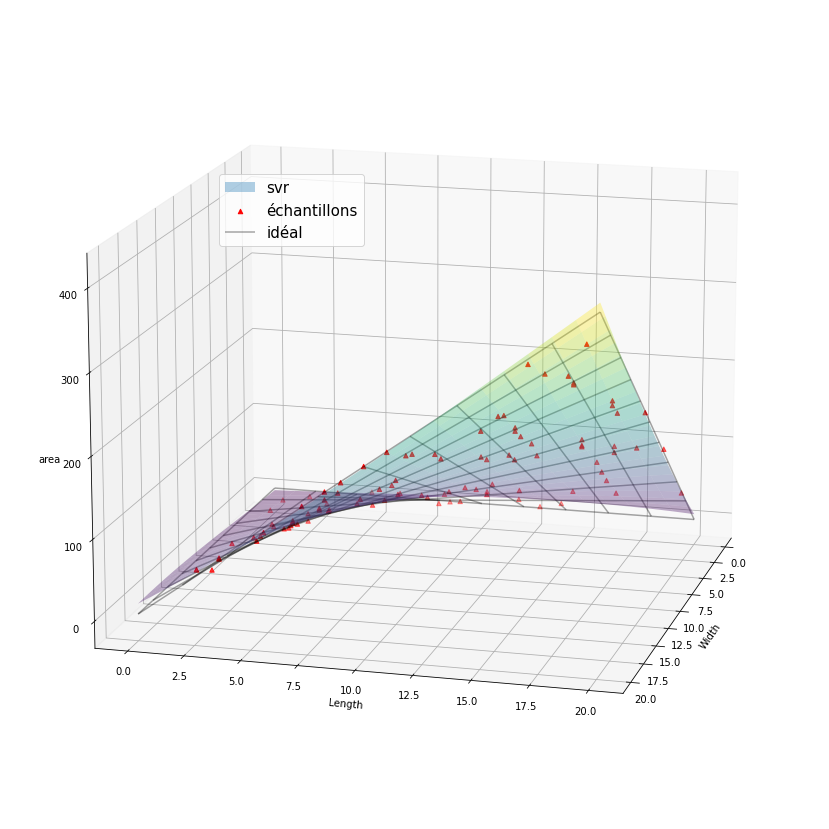

In [22]:
X = np.arange(0, 21, 1) # on discrétise l'axe des x par pas de 1
Y = np.arange(0, 21, 1) # idem sur Y
X, Y = np.meshgrid(X, Y)
Z = rectArea(X,Y)
points=np.c_[X.ravel(), Y.ravel()]
Zhat = svr.predict(points)
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Zhat.reshape(21,-1), cmap = 'viridis',alpha=0.35, linewidth=0, antialiased=True, label="svr")
ax.scatter(df['Width'],df['Length'], df['Area'], color = 'r',marker='^',label="échantillons")
ax.plot_wireframe(X, Y, Z, color = 'k', cstride=2, rstride=2,alpha=0.35,label="idéal")

mpl.rcParams['legend.fontsize'] = 15
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax.legend(loc='center left', bbox_to_anchor=(0.25, 0.75))
ax.view_init(elev=15, azim=15)
ax.set_xlabel('Width')
ax.set_ylabel('Length')
ax.set_zlabel('area')

plt.show()

In [23]:
y_pred=svr.predict(points)
print(f"MAE  = {mean_absolute_error(Z.ravel(),y_pred):.2f}")

MAE  = 2.92
